###Naive Bayes Classifier

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Heart.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [ ]:
print("Number of records in each label are")
df['target'].value_counts()

Number of records in each label are


1    165
0    138
Name: target, dtype: int64

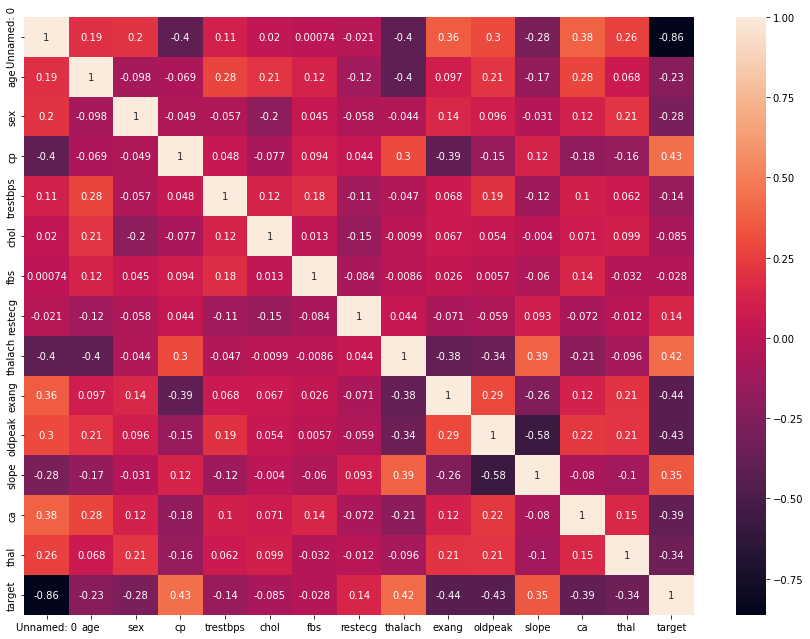

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(15,11))
sns.heatmap(df_corr, annot = True)
plt.show()

In [ ]:
X = df.drop('target',axis=1)
y=df['target']
print(X.shape, y.shape)

(303, 14) (303,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(212, 14) (91, 14) (212,) (91,)


In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the required library
from sklearn.naive_bayes import GaussianNB

# Modeling the NB classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Predicting the train and test sets
y_train_predict_nb = nb_clf.predict(X_train)
y_test_predict_nb = nb_clf.predict(X_test)

# Evaluating accuracy scores
print('Accuracy on the training set: {:.2f}'.format(nb_clf.score(X_train, y_train)))
print('Accuracy on the test set: {:.2f}'.format(nb_clf.score(X_test, y_test)))

Accuracy on the training set: 0.96
Accuracy on the test set: 0.96


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_test_predict_nb))
print(classification_report(y_test, y_test_predict_nb))

[[40  1]
 [ 3 47]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.98      0.94      0.96        50

    accuracy                           0.96        91
   macro avg       0.95      0.96      0.96        91
weighted avg       0.96      0.96      0.96        91



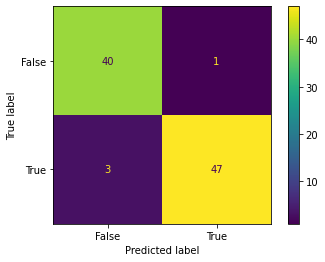

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, y_test_predict_nb)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()